CONSTRUCCION DE LA RED NEURONAL BASADA EN EL DATASET DE "Risk Factors for Cardiovascular Heart Disease"

PRIMERO REALIZAMOS LA LIMPIEZA Y ORDENAMIENTO DE LOS DATOS

#Vamos a trabajar sobre un dataset que evalua distintos tipos factores de riesgo

#ordenar de menor a mayor segun edad

#verificar si en alguna de mis variables de entrada tengo valores negativos

#modificar los valores de la columna edad ya que estan dados en DIAS

#ver si hay valores atipicos o no




In [5]:
#Primera parte:
#Limpieza y ordenamiento sobre los datos
#Vamos a trabajar sobre un dataset que evalua distintos tipos factores de riesgo
import numpy as np
import pandas as pd

datos= pd.read_csv("factor-de-riesgo.csv")
datos_back_up=pd.read_csv("factor-de-riesgo.csv")
datos_back_up_respaldo=pd.read_csv("factor-de-riesgo.csv")
#ordenar de menor a mayor segun edad
#verificar si en alguna de mis variables de entrada tengo valores negativos
#modificar los valores de la columna edad ya que estan dados en dias


#Mostramos lo primeros 10 datos del dataset
print(datos.head(10))



   index  id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
0      0   0  18393       2     168    62.0    110     80            1     1   
1      1   1  20228       1     156    85.0    140     90            3     1   
2      2   2  18857       1     165    64.0    130     70            3     1   
3      3   3  17623       2     169    82.0    150    100            1     1   
4      4   4  17474       1     156    56.0    100     60            1     1   
5      5   8  21914       1     151    67.0    120     80            2     2   
6      6   9  22113       1     157    93.0    130     80            3     1   
7      7  12  22584       2     178    95.0    130     90            3     3   
8      8  13  17668       1     158    71.0    110     70            1     1   
9      9  14  19834       1     164    68.0    110     60            1     1   

   smoke  alco  active  cardio  
0      0     0       1       0  
1      0     0       1       1  
2      0     0      

In [415]:
#Primero observamos que nuestro dataset consta de 13 variables de entrada y 1 variable de salida.
#Y en total tenemos 70.000 filas de datos de entrada
print(datos.shape)

(70000, 14)


In [416]:
#Luego mostramos el nombre de nuestros datos de entrada y el tipo del que son.
print(datos.columns)
print("--------------------------------------------------------------------------------------")
print(datos.dtypes)
#Se observa que tenemos 13 variables del tipo entero y 1 variable del tipo float

Index(['index', 'id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')
--------------------------------------------------------------------------------------
index            int64
id               int64
age              int64
gender           int64
height           int64
weight         float64
ap_hi            int64
ap_lo            int64
cholesterol      int64
gluc             int64
smoke            int64
alco             int64
active           int64
cardio           int64
dtype: object


In [417]:
#Pasamos a mostrar los primeros 10 datos del dataset
datos.head()

,index,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [418]:
#Para la limpieza de datos lo que primero vamos a hacer es verificar si existen datos faltantes en algunas de las filas, y de ser asi vamos a eliminar estas filas para un mejor analisis
datos.info()
#como podemos observar en todas las columnas tenemos datos.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   index        70000 non-null  int64  
 1   id           70000 non-null  int64  
 2   age          70000 non-null  int64  
 3   gender       70000 non-null  int64  
 4   height       70000 non-null  int64  
 5   weight       70000 non-null  float64
 6   ap_hi        70000 non-null  int64  
 7   ap_lo        70000 non-null  int64  
 8   cholesterol  70000 non-null  int64  
 9   gluc         70000 non-null  int64  
 10  smoke        70000 non-null  int64  
 11  alco         70000 non-null  int64  
 12  active       70000 non-null  int64  
 13  cardio       70000 non-null  int64  
dtypes: float64(1), int64(13)
memory usage: 7.5 MB


In [7]:
#Paso a transformar los datos de la variable 'age' que estan en dias a años dividiendolos por 365.
datos.age = (datos.age)/365
datos.head()

,index,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,0,50.391781,2,168,62.0,110,80,1,1,0,0,1,0
1,1,1,55.419178,1,156,85.0,140,90,3,1,0,0,1,1
2,2,2,51.663014,1,165,64.0,130,70,3,1,0,0,0,1
3,3,3,48.282192,2,169,82.0,150,100,1,1,0,0,1,1
4,4,4,47.873973,1,156,56.0,100,60,1,1,0,0,0,0


In [8]:
#Como los datos de la variable 'age' estan en putno flotante, voy a realizar una ultima conversion a entero
datos.age= datos.age.astype(int)
datos.head()

,index,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,1,1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,2,2,51,1,165,64.0,130,70,3,1,0,0,0,1
3,3,3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,4,4,47,1,156,56.0,100,60,1,1,0,0,0,0


In [9]:
#Creamos una lista de las columnas para verificar si existen numeros negativos en las variables de entrada
columnas = ['cardio', 'age', 'height', 'weight', 'cholesterol', 'gluc', 'smoke', 'alco', 'active','ap_hi','ap_lo','index','id','gender']
for columna in columnas:
    conteo = (datos[columna] < 0).sum()
    print(f"{columna}: {conteo}")
#como podemos visualizar, en las columnas 'ap_hi' y 'ap_lo', tengo valores negativos y esto es impoaible ya que los valores de las presiones sistolica y diastolica son valores siempre POSITIVOS
#por eso pasamos a eliminarlos

cardio: 0
age: 0
height: 0
weight: 0
cholesterol: 0
gluc: 0
smoke: 0
alco: 0
active: 0
ap_hi: 7
ap_lo: 1
index: 0
id: 0
gender: 0


In [10]:
#Paso a eliminar estas filas que no me ayudarian a mi analisis posterior( primero los de la variable 'ap_lo')
datos=datos[datos['ap_lo']>=0]
datos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 69999 entries, 0 to 69999
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   index        69999 non-null  int64  
 1   id           69999 non-null  int64  
 2   age          69999 non-null  int32  
 3   gender       69999 non-null  int64  
 4   height       69999 non-null  int64  
 5   weight       69999 non-null  float64
 6   ap_hi        69999 non-null  int64  
 7   ap_lo        69999 non-null  int64  
 8   cholesterol  69999 non-null  int64  
 9   gluc         69999 non-null  int64  
 10  smoke        69999 non-null  int64  
 11  alco         69999 non-null  int64  
 12  active       69999 non-null  int64  
 13  cardio       69999 non-null  int64  
dtypes: float64(1), int32(1), int64(12)
memory usage: 7.7 MB


In [11]:
#despues pasamos a eliminar lo de la variable restante('ap_hi') y vamos a verificar que ahora tenemos un dataset con 69992 datos.
datos=datos[datos['ap_hi']>=0]
datos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 69992 entries, 0 to 69999
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   index        69992 non-null  int64  
 1   id           69992 non-null  int64  
 2   age          69992 non-null  int32  
 3   gender       69992 non-null  int64  
 4   height       69992 non-null  int64  
 5   weight       69992 non-null  float64
 6   ap_hi        69992 non-null  int64  
 7   ap_lo        69992 non-null  int64  
 8   cholesterol  69992 non-null  int64  
 9   gluc         69992 non-null  int64  
 10  smoke        69992 non-null  int64  
 11  alco         69992 non-null  int64  
 12  active       69992 non-null  int64  
 13  cardio       69992 non-null  int64  
dtypes: float64(1), int32(1), int64(12)
memory usage: 7.7 MB


In [12]:
datos.head(8)

,index,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,1,1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,2,2,51,1,165,64.0,130,70,3,1,0,0,0,1
3,3,3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,4,4,47,1,156,56.0,100,60,1,1,0,0,0,0
5,5,8,60,1,151,67.0,120,80,2,2,0,0,0,0
6,6,9,60,1,157,93.0,130,80,3,1,0,0,1,0
7,7,12,61,2,178,95.0,130,90,3,3,0,0,1,1


In [13]:
#Paso a eliminar tambien las columnas que no son de mi interes para el estudio
datos= datos.drop(['index','id'], axis=1)
datos.head(8)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,51,1,165,64.0,130,70,3,1,0,0,0,1
3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,47,1,156,56.0,100,60,1,1,0,0,0,0
5,60,1,151,67.0,120,80,2,2,0,0,0,0
6,60,1,157,93.0,130,80,3,1,0,0,1,0
7,61,2,178,95.0,130,90,3,3,0,0,1,1


In [14]:
#paso a ordenar de menor a mayor segun la variable 'edad'
datos= datos.sort_values(by='age')
datos.head(20)


,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
30666,29,1,159,59.0,120,80,1,1,0,0,1,0
6219,29,1,175,59.0,120,80,1,1,0,0,1,0
22343,29,2,175,92.0,100,60,1,1,0,0,1,0
55905,30,1,160,59.0,110,70,1,1,0,0,1,0
13757,39,1,152,90.0,160,100,2,2,0,0,1,1
11507,39,2,160,70.0,120,60,1,2,0,0,0,1
66636,39,2,163,87.0,150,100,1,1,0,0,1,1
59042,39,1,172,57.0,110,60,1,1,0,0,1,0
42844,39,1,157,60.0,120,80,1,1,0,0,0,0
1716,39,1,153,50.0,100,60,1,1,0,0,1,0


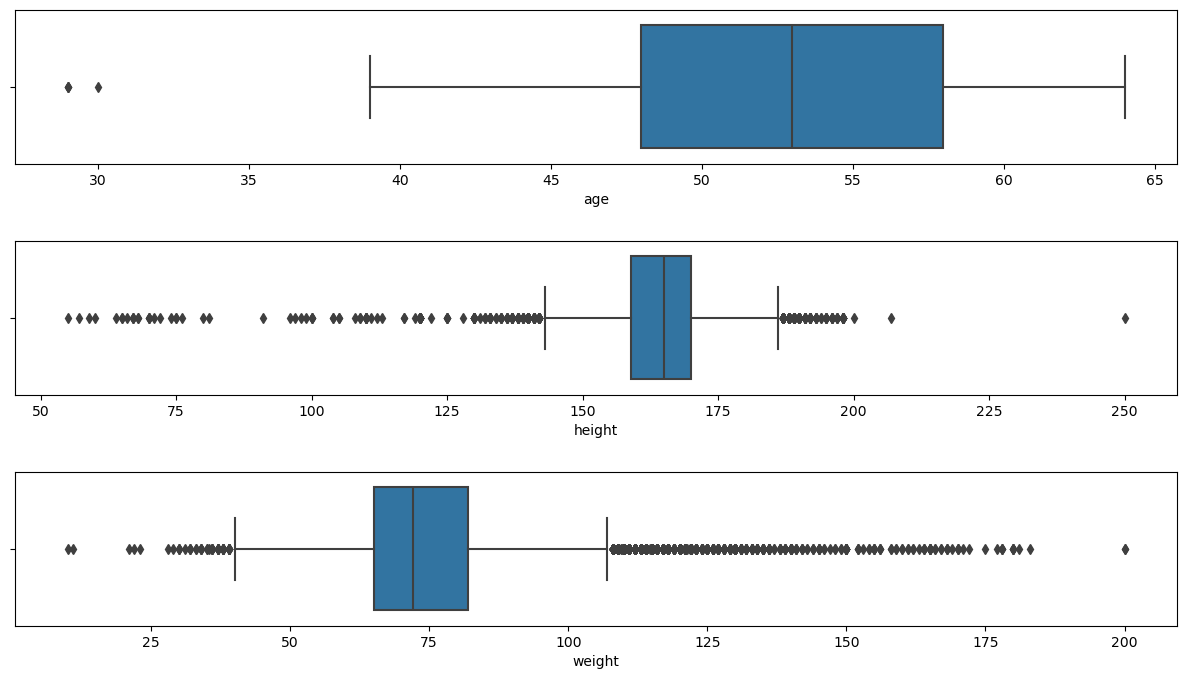

In [15]:
#Ahora lo que analizamos es si existen valores atipicos en ciertas variables que consideramos mas importantes que otras
#En este caso, vamos a mostrar un diagrama boxplot (o diagrama de caja) en los cuales vamos a poder ver con mayor facilidad estos datos buscados
#Estudiamos estas 3 variables: 'age', 'height' y 'weight'
import seaborn as sns
import matplotlib.pyplot as plt
variables= ['age','height','weight']
fig, ax =plt.subplots(nrows=3,ncols=1, figsize=(15,8))
fig.subplots_adjust(hspace=0.5)

for i,col in enumerate (variables):
    sns.boxplot(x=col, data=datos, ax=ax[i])

#OBSERVACIONES:    
#El boxplot de la variable 'age' tenemos dos outliers o puntos atipicos que vemos que no estan dentro de los datos generales.
#Para el caso de la variable 'height' vemos que el 50% de los datos se encuentran entre 140 y 190 cm aproximadamente
#Y para el tercer boxplot de la variable 'weight' vemos que el 50% de los datos se encuentran entre 40 y 110 kg aproximadamente


In [16]:
datos.describe()


,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,69992.000000,69992.000000,69992.000000,69992.000000,69992.000000,69992.000000,69992.000000,69992.000000,69992.000000,69992.000000,69992.000000,69992.000000
mean,52.840696,1.349554,164.359384,74.206485,128.843868,96.634601,1.366885,1.226483,0.088139,0.053778,0.803735,0.499700
std,6.766341,0.476833,8.210423,14.395726,153.999302,188.482151,0.680272,0.572298,0.283498,0.225580,0.397174,0.500003
min,29.000000,1.000000,55.000000,10.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,53.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,58.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,64.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [17]:
#Lo que decidimos realizar es tomar los valores de altura entre 120 y 200 cm
#y tambien filtramos en la variable edad en aquellos que tiene edad mayor o igual a 39 años
#y por utlimo decidimos quedarnos con los valores de peso mayores a 41kg y menores a 105
#Entonces filtramos el dataset en este nuevo rango para nuestro analisis
datos=datos[datos['height']>=120]
datos=datos[datos['height']<=200]
datos=datos[datos['age']>=39]
datos=datos[datos['weight']>=41]
datos=datos[datos['weight']<=105]
datos.shape

(67815, 12)

HASTA ACA SE LLEGO CON LA LIMPIEZA DE DATOS!

DECIDIMOS TOMAR LA ALTURA MINIMA 1,20 Y MAXIMA 2 METROS

Y DE PESO 41 KG PESO MINIMO Y 105 PESO MAXIMO

NO SE SI ESTAN BIEN TOMADOS ESOS RANGOS SEGUNS MIS GRAFICOS O TENDRIA QUE HACER AUN MAS RECORTES! (DUDA)

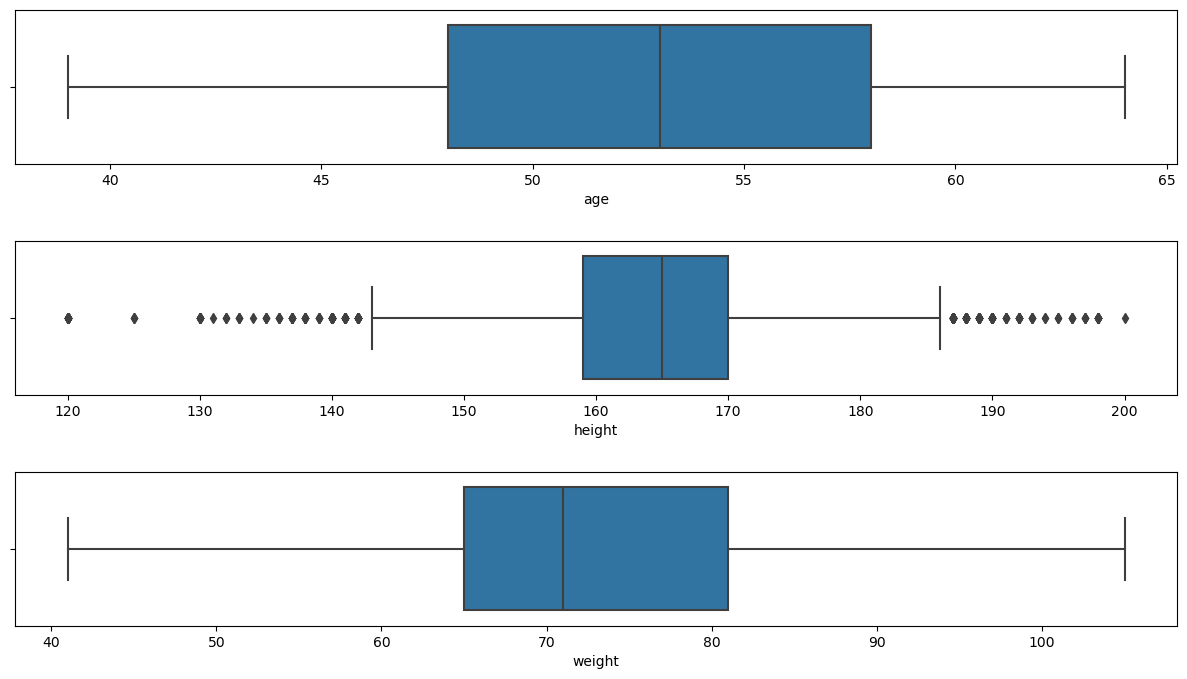

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
variables= ['age','height','weight']
fig, ax =plt.subplots(nrows=3,ncols=1, figsize=(15,8))
fig.subplots_adjust(hspace=0.5)

for i,col in enumerate (variables):
    sns.boxplot(x=col, data=datos, ax=ax[i])


In [19]:
datos.describe().round(3)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,67815.000,67815.000,67815.000,67815.000,67815.000,67815.000,67815.000,67815.000,67815.000,67815.000,67815.000,67815.000
mean,52.841,1.347,164.309,72.975,128.573,95.945,1.359,1.220,0.087,0.053,0.804,0.494
std,6.763,0.476,7.831,12.262,156.397,188.952,0.674,0.566,0.281,0.223,0.397,0.500
min,39.000,1.000,120.000,41.000,1.000,0.000,1.000,1.000,0.000,0.000,0.000,0.000
25%,48.000,1.000,159.000,65.000,120.000,80.000,1.000,1.000,0.000,0.000,1.000,0.000
50%,53.000,1.000,165.000,71.000,120.000,80.000,1.000,1.000,0.000,0.000,1.000,0.000
75%,58.000,2.000,170.000,81.000,140.000,90.000,1.000,1.000,0.000,0.000,1.000,1.000
max,64.000,2.000,200.000,105.000,16020.000,11000.000,3.000,3.000,1.000,1.000,1.000,1.000


ACA LO REALIZO CON MI DATASET CASI TERMINADO ES EXTRAERLE LA ULTIMA COLUMNA (LA CUAL SERIA MI VARIABLE DE SALIDA) 

PARA PODER ESTANDARIZAR LOS VALORES DE MIS VARIABLES DE ENTRADA Y ANALIZAR LAS CORRELACIONES DE MIS VARIABLES

In [20]:
#extraigo la ultima columna de mi dataset para poder estandarizar, y luego despues de la normalizacion la agrego
datos.head()
extraccion_ultima_fila=datos.pop('cardio')

In [21]:
#procedimiento de estandarizacion
datos_mediciones = datos.describe().T
df_normalizado = (datos - datos_mediciones['mean']) / datos_mediciones['std']
df_normalizado.describe().round(3)


,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
count,67815.000,67815.000,67815.000,67815.000,67815.000,67815.000,67815.000,67815.000,67815.000,67815.000,67815.000
mean,0.000,-0.000,-0.000,-0.000,-0.000,0.000,-0.000,-0.000,-0.000,-0.000,-0.000
std,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000
min,-2.046,-0.729,-5.658,-2.608,-0.816,-0.508,-0.532,-0.389,-0.308,-0.236,-2.028
25%,-0.716,-0.729,-0.678,-0.650,-0.055,-0.084,-0.532,-0.389,-0.308,-0.236,0.493
50%,0.023,-0.729,0.088,-0.161,-0.055,-0.084,-0.532,-0.389,-0.308,-0.236,0.493
75%,0.763,1.372,0.727,0.655,0.073,-0.031,-0.532,-0.389,-0.308,-0.236,0.493
max,1.650,1.372,4.558,2.612,101.610,57.708,2.436,3.144,3.245,4.244,0.493


In [22]:
#por ultimo paso a ver las correlaciones entre las variables
df_normalizado.corr()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
age,1.000000,-0.021410,-0.084689,0.066377,0.020677,0.018427,0.155214,0.098706,-0.044298,-0.028443,-0.010626
gender,-0.021410,1.000000,0.509721,0.165421,0.005625,0.014701,-0.038512,-0.022187,0.338764,0.169924,0.007040
height,-0.084689,0.509721,1.000000,0.310002,0.004168,0.004152,-0.063927,-0.027755,0.190329,0.092740,-0.006281
weight,0.066377,0.165421,0.310002,1.000000,0.028956,0.038667,0.128044,0.089149,0.063166,0.062763,-0.013438
ap_hi,0.020677,0.005625,0.004168,0.028956,1.000000,0.015079,0.022986,0.010932,-0.001422,0.000930,0.000105
ap_lo,0.018427,0.014701,0.004152,0.038667,0.015079,1.000000,0.022324,0.009208,0.003846,0.011438,0.004057
cholesterol,0.155214,-0.038512,-0.063927,0.128044,0.022986,0.022324,1.000000,0.450270,0.007367,0.033933,0.010916
gluc,0.098706,-0.022187,-0.027755,0.089149,0.010932,0.009208,0.450270,1.000000,-0.008845,0.007218,-0.005504
smoke,-0.044298,0.338764,0.190329,0.063166,-0.001422,0.003846,0.007367,-0.008845,1.000000,0.342304,0.029752
alco,-0.028443,0.169924,0.092740,0.062763,0.000930,0.011438,0.033933,0.007218,0.342304,1.000000,0.028550


REALIZA EL MAPA DE CALOR PARA VER CORRELACIONES ENTRE VARIABLES

<Figure size 1000x1000 with 0 Axes>

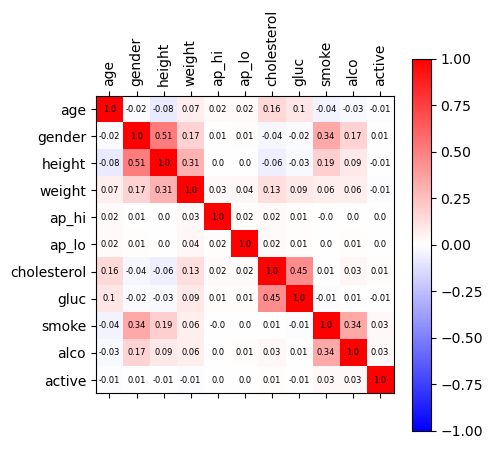

In [23]:
#Paso a realizar el mapa de calor para las correlaciones
matriz= df_normalizado.corr()
plt.figure(figsize=(10, 10))
plt.matshow(matriz, cmap="bwr",vmin=-1,vmax=1)
plt.xticks(range(11),df_normalizado.columns, rotation=90)
plt.yticks(range(11),df_normalizado.columns)

for i in range(len(matriz.columns)):
    for j in range(len(matriz.columns)):
        plt.text(i,j,round(matriz.iloc[i,j],2),ha="center",va="center",fontsize=6)

plt.colorbar()
plt.show()

ACA AGREGO LA COLUMNA DE SALIDA QUE HABIA EXTRADIO ANTES PARA LA ESTANDARIZACION.



In [24]:
#agrego la columna de miv ariable de salida 'cardio' a mi dataset ya estandarizado
df_normalizado.head()
df_normalizado['cardio']=extraccion_ultima_fila
df_normalizado.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
13757,-2.046487,-0.728872,-1.571799,1.388494,0.200943,0.021459,0.952065,1.377163,-0.308204,-0.235623,0.492982,1
11507,-2.046487,1.371963,-0.550208,-0.242585,-0.054816,-0.190235,-0.532137,1.377163,-0.308204,-0.235623,-2.028442,1
66636,-2.046487,1.371963,-0.167111,1.143832,0.137004,0.021459,-0.532137,-0.389322,-0.308204,-0.235623,0.492982,1
59042,-2.046487,-0.728872,0.982179,-1.302786,-0.118756,-0.190235,-0.532137,-0.389322,-0.308204,-0.235623,0.492982,0
42844,-2.046487,-0.728872,-0.933305,-1.058124,-0.054816,-0.084388,-0.532137,-0.389322,-0.308204,-0.235623,-2.028442,0


In [25]:
datos_limpios= df_normalizado
datos_limpios.head()


,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
13757,-2.046487,-0.728872,-1.571799,1.388494,0.200943,0.021459,0.952065,1.377163,-0.308204,-0.235623,0.492982,1
11507,-2.046487,1.371963,-0.550208,-0.242585,-0.054816,-0.190235,-0.532137,1.377163,-0.308204,-0.235623,-2.028442,1
66636,-2.046487,1.371963,-0.167111,1.143832,0.137004,0.021459,-0.532137,-0.389322,-0.308204,-0.235623,0.492982,1
59042,-2.046487,-0.728872,0.982179,-1.302786,-0.118756,-0.190235,-0.532137,-0.389322,-0.308204,-0.235623,0.492982,0
42844,-2.046487,-0.728872,-0.933305,-1.058124,-0.054816,-0.084388,-0.532137,-0.389322,-0.308204,-0.235623,-2.028442,0




AHORA LO QUE PASO A REALIZAR ES EL ARMADO DE LA RED NEURONAL :

UNA SOLA CAPA OCULTA DE 3 NODOS CON LA FUNCION DE ACTIVACION RELU

Y UNA CAPA DE SALIDA CON 1 SOLO NODO CON LA FUNCION DE ACTIVACION LOGISTICA



In [26]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

#definimos las entradas y la salida
entradas= datos_limpios.iloc[:,0:11].values
salidas= datos_limpios.iloc[:,-1].values

#pasamos a dividir los datos en ENTRENAMIENTO y PRUEBA
X_train, X_test, Y_train, Y_test = train_test_split(entradas, salidas,test_size=1/3)

#registros de entrenamiento
n=X_train.shape[0]
print('-------------------------------------------------')
print(n)
np.random.seed(6)

#armamos la red neuronal la cual va a consistir de una capa oculta de 3 nodos 
w_hidden = np.random.rand(3,11)
w_output= np.random.rand(1,3)

b_hidden= np.random.rand(3,1)
b_output= np.random.rand(1,1)

# Funciones de activacion
relu = lambda x: np.maximum(x, 0)
logistic = lambda x: 1 / (1 + np.exp(-x))

#definimos la funcion para correr la red neuronal
def forward_prop(X):
    Z1 = w_hidden @ X + b_hidden
    A1 = relu(Z1)
    Z2 = w_output @ A1 + b_output
    A2 = logistic(Z2)
    return Z1, A1, Z2, A2



-------------------------------------------------
45210


REALIZO EL CALCULO DE PRECISION DE LA RED

In [27]:
#Ahora calculo la precision
test_predictions = forward_prop(X_test.transpose())[3]
test_predictions= (test_predictions >= 0.5).astype(int)
accuracy=np.mean(test_predictions==Y_test.reshape(1,-1))
print(f"la precision de la red es de: {accuracy}")

la precision de la red es de: 0.4930767529307675


REALIZAMOS EL BACK-PROPAGATION

In [28]:
#Ahora pasamos a realizar el backpropagation para ajustar los pesos y sesegos para poder reducir la tasa de error
#Primero defino la funcion de backpropagation y despues las derivadas de las funciones de la capa oculta y de la de salida(relu, logistica)

#BackPropagation
def backward_prop(Z1, A1, Z2, A2, X, Y):
    dC_dA2 = 2 * A2 - 2 * Y
    dA2_dZ2 = d_logistic(Z2)
    dZ2_dA1 = w_output
    dZ2_dW2 = A1
    dZ2_dB2 = 1
    dA1_dZ1 = d_relu(Z1)
    dZ1_dW1 = X
    dZ1_dB1 = 1

    dC_dW2 = dC_dA2 @ dA2_dZ2 @ dZ2_dW2.T

    dC_dB2 = dC_dA2 @ dA2_dZ2 * dZ2_dB2

    dC_dA1 = dC_dA2 @ dA2_dZ2 @ dZ2_dA1

    dC_dW1 = dC_dA1 @ dA1_dZ1 @ dZ1_dW1.T

    dC_dB1 = dC_dA1 @ dA1_dZ1 * dZ1_dB1

    return dC_dW1, dC_dB1, dC_dW2, dC_dB2

#Derivadas de las funciones Relu y Logistica
d_relu = lambda x: x > 0
d_logistic = lambda x: np.exp(-x) / (1 + np.exp(-x)) ** 2

REALIZAMOS EL DESCENSO DE GRADIENTE ESTOCASTICO


In [29]:
#Pasamos a realizar el gradiente estocastico para poder entrenar a la red
L=0.03 #Tasa de aprendizaje
for i in range(200_000):
    # seleccionar aleatoriamente uno de los datos de entrenamiento
    idx = np.random.choice(n, 1, replace=False)
    X_sample = X_train[idx].transpose()
    Y_sample = Y_train[idx]

    # pasar datos seleccionados aleatoriamente a través de la red neuronal
    Z1, A1, Z2, A2 = forward_prop(X_sample)

    # distribuir error a través de la retropropagación
    # y devolver pendientes para pesos y sesgos
    dW1, dB1, dW2, dB2 = backward_prop(Z1, A1, Z2, A2, X_sample, Y_sample)

    # actualizar pesos y sesgos
    w_hidden -= L * dW1
    b_hidden -= L * dB1
    w_output -= L * dW2
    b_output -= L * dB2



LA DUDA LA TENEMOS ACA PORQUE PROBANDO VARIOS VALORES PARA "L" Y PARA LAS ITERACIONES , LLEGAMOS SOLO A UN 0.7265 DE PRECISION/ACCURACY COMO MAXIMO

In [30]:
test_predictions = forward_prop(X_test.transpose())[3]
test_predictions= (test_predictions >= 0.5).astype(int)
accuracy=np.mean(test_predictions==Y_test.reshape(1,-1))
print(f"la precision de la red es de: {accuracy}")
print(f"la tasa de aprendizaje es de:{L} y las iteraciones son {i}")

la precision de la red es de: 0.7143552311435523
la tasa de aprendizaje es de:0.03 y las iteraciones son 199999


In [470]:
test_predictions = forward_prop(X_test.transpose())[3]
test_predictions= (test_predictions >= 0.5).astype(int)
accuracy=np.mean(test_predictions==Y_test.reshape(1,-1))
print(f"la precision de la red es de: {accuracy}")
print(f"la tasa de aprendizaje es de:{L} y las iteraciones son {i}")

la precision de la red es de: 0.7232470692324707
la tasa de aprendizaje es de:0.03 y las iteraciones son 199999


In [468]:
test_predictions = forward_prop(X_test.transpose())[3]
test_predictions= (test_predictions >= 0.5).astype(int)
accuracy=np.mean(test_predictions==Y_test.reshape(1,-1))
print(f"la precision de la red es de: {accuracy}")
print(f"la tasa de aprendizaje es de:{L} y las iteraciones son {i}")

la precision de la red es de: 0.7204600752046008
la tasa de aprendizaje es de:0.03 y las iteraciones son 99999


In [466]:
test_predictions = forward_prop(X_test.transpose())[3]
test_predictions= (test_predictions >= 0.5).astype(int)
accuracy=np.mean(test_predictions==Y_test.reshape(1,-1))
print(f"la precision de la red es de: {accuracy}")
print(f"la tasa de aprendizaje es de:{L} y las iteraciones son {i}")

la precision de la red es de: 0.7246184472461845
la tasa de aprendizaje es de:0.01 y las iteraciones son 99999


In [464]:
test_predictions = forward_prop(X_test.transpose())[3]
test_predictions= (test_predictions >= 0.5).astype(int)
accuracy=np.mean(test_predictions==Y_test.reshape(1,-1))
print(f"la precision de la red es de: {accuracy}")
print(f"la tasa de aprendizaje es de:{L} y las iteraciones son {i}")

la precision de la red es de: 0.7265649192656491
la tasa de aprendizaje es de:0.009 y las iteraciones son 99999


In [462]:
test_predictions = forward_prop(X_test.transpose())[3]
test_predictions= (test_predictions >= 0.5).astype(int)
accuracy=np.mean(test_predictions==Y_test.reshape(1,-1))
print(f"la precision de la red es de: {accuracy}")
print(f"la tasa de aprendizaje es de:{L} y las iteraciones son {i}")

la precision de la red es de: 0.7235567352355674
la tasa de aprendizaje es de:0.007 y las iteraciones son 99999


In [460]:
test_predictions = forward_prop(X_test.transpose())[3]
test_predictions= (test_predictions >= 0.5).astype(int)
accuracy=np.mean(test_predictions==Y_test.reshape(1,-1))
print(f"la precision de la red es de: {accuracy}")
print(f"la tasa de aprendizaje es de:{L} y las iteraciones son {i}")

la precision de la red es de: 0.718513603185136
la tasa de aprendizaje es de:0.005 y las iteraciones son 99999


In [458]:
test_predictions = forward_prop(X_test.transpose())[3]
test_predictions= (test_predictions >= 0.5).astype(int)
accuracy=np.mean(test_predictions==Y_test.reshape(1,-1))
print(f"la precision de la red es de: {accuracy}")
print(f"la tasa de aprendizaje es de:{L} y las iteraciones son {i}")

la precision de la red es de: 0.7182481751824817
la tasa de aprendizaje es de:0.003 y las iteraciones son 99999


In [456]:
test_predictions = forward_prop(X_test.transpose())[3]
test_predictions= (test_predictions >= 0.5).astype(int)
accuracy=np.mean(test_predictions==Y_test.reshape(1,-1))
print(f"la precision de la red es de: {accuracy}")
print(f"la tasa de aprendizaje es de:{L} y las iteraciones son {i}")

la precision de la red es de: 0.6705596107055961
la tasa de aprendizaje es de:0.001 y las iteraciones son 99999


In [454]:
test_predictions = forward_prop(X_test.transpose())[3]
test_predictions= (test_predictions >= 0.5).astype(int)
accuracy=np.mean(test_predictions==Y_test.reshape(1,-1))
print(f"la precision de la red es de: {accuracy}")
print(f"la tasa de aprendizaje es de:{L} y las iteraciones son {i}")

la precision de la red es de: 0.650519796505198
la tasa de aprendizaje es de:0.0008 y las iteraciones son 99999


In [452]:
test_predictions = forward_prop(X_test.transpose())[3]
test_predictions= (test_predictions >= 0.5).astype(int)
accuracy=np.mean(test_predictions==Y_test.reshape(1,-1))
print(f"la precision de la red es de: {accuracy}")
print(f"la tasa de aprendizaje es de:{L} y las iteraciones son {i}")

la precision de la red es de: 0.631541694315417
la tasa de aprendizaje es de:0.0005 y las iteraciones son 99999


In [447]:
test_predictions = forward_prop(X_test.transpose())[3]
test_predictions= (test_predictions >= 0.5).astype(int)
accuracy=np.mean(test_predictions==Y_test.reshape(1,-1))
print(f"la precision de la red es de: {accuracy}")

la precision de la red es de: 0.5946029639460296


Y ACA PARA PROBAR QUE TAN BIEN ANDA LA RED NEURONAL LE FUI PASANDO LOS DATOS, EL TEMA EN CUESTION ES QUE CUANDO LE PASE 

LOS VALORES DE ENTRADA DE MI DATASET ORIGINAL ME DABA SIEMPRE QUE LAS PREDICCIONES ME DABAN 1, EN CAMBIO 

SI ELEGIMOS LOS VALORES DE MI DATASET YA LIMPIO Y ESTANDARIZADO SI ME DABAN ALGUNOS VALORES MAS ACORDES. 

( COMO POR EJEMPLO LOS QUE DEJE ESCRITO ACA EN EL CODIGO)

In [41]:
#El siguiente paso es agarrar muestras de mi dataset y psarlas por la red neuronal para observar la prediccion de cada una.
#Y paso a guardar los resultados "prediccion" de cada muestra en una lista.
cantidad_de_muestras = 5
muestras_de_prueba = datos_limpios.sample(cantidad_de_muestras)
muestras_de_prueba.head(5)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
69007,0.467009,-0.728872,-0.677907,0.165185,0.073064,-0.031464,0.952065,-0.389322,-0.308204,-0.235623,-2.028442,1
14388,0.762714,-0.728872,1.748373,1.877818,-0.022846,-0.084388,-0.532137,-0.389322,-0.308204,-0.235623,0.492982,1
17528,-1.750781,-0.728872,0.599082,1.633156,-0.118756,-0.137311,0.952065,-0.389322,-0.308204,-0.235623,0.492982,0
33498,0.171303,-0.728872,0.726781,0.165185,-0.054816,-0.084388,-0.532137,-0.389322,-0.308204,-0.235623,0.492982,0
42675,1.058419,-0.728872,-1.061004,-0.242585,0.009124,-0.031464,-0.532137,-0.389322,-0.308204,-0.235623,0.492982,0


In [42]:
muestras_de_prueba_final= muestras_de_prueba.drop(columns=["cardio"])
muestras_de_prueba_final.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
69007,0.467009,-0.728872,-0.677907,0.165185,0.073064,-0.031464,0.952065,-0.389322,-0.308204,-0.235623,-2.028442
14388,0.762714,-0.728872,1.748373,1.877818,-0.022846,-0.084388,-0.532137,-0.389322,-0.308204,-0.235623,0.492982
17528,-1.750781,-0.728872,0.599082,1.633156,-0.118756,-0.137311,0.952065,-0.389322,-0.308204,-0.235623,0.492982
33498,0.171303,-0.728872,0.726781,0.165185,-0.054816,-0.084388,-0.532137,-0.389322,-0.308204,-0.235623,0.492982
42675,1.058419,-0.728872,-1.061004,-0.242585,0.009124,-0.031464,-0.532137,-0.389322,-0.308204,-0.235623,0.492982


In [43]:
for index , muestra in muestras_de_prueba_final.iterrows():
    entrada= muestra.values[:].reshape(1,-1)
    entrada_transpuesta=np.transpose(entrada)

    Z1_nueva,A1_nueva,Z2_nueva,A2_nueva = forward_prop(entrada_transpuesta)

    if (A2_nueva > 0.5):
        prediccion = 1
    elif (A2_nueva<=0.5):
        prediccion = 0

    print(f"prediccion ejemplo {index}: ",prediccion)
    print(f"el valor de la A2 nueva es de:  {A2_nueva}")
    print("--------------------------------------------------------")

prediccion ejemplo 69007:  1
el valor de la A2 nueva es de:  [[0.84484024]]
--------------------------------------------------------
prediccion ejemplo 14388:  1
el valor de la A2 nueva es de:  [[0.54932978]]
--------------------------------------------------------
prediccion ejemplo 17528:  0
el valor de la A2 nueva es de:  [[0.26968644]]
--------------------------------------------------------
prediccion ejemplo 33498:  0
el valor de la A2 nueva es de:  [[0.37952458]]
--------------------------------------------------------
prediccion ejemplo 42675:  1
el valor de la A2 nueva es de:  [[0.70157084]]
--------------------------------------------------------
